In [1]:
%reload_ext autoreload
%reload_ext line_profiler
%autoreload 2

In [7]:
from multiprocessing import Pool
import experiments
import pickle 
import os 
import matplotlib.pyplot as plt
import numpy as np
from functools import partial

%matplotlib inline

In [13]:
N = 10
wsqs = (10,50)
tvs = (0.05, 0.5)

if __name__ ==  '__main__': 
    num_processors = 4
    p=Pool(processes = num_processors)
    output = p.starmap(experiments.width_experiment,[(N,wsq,tv) for wsq in wsqs for tv in tvs])
    print(output)

for wsq in wsqs:
    for tv in tvs:
        pointwise_asym = experiments.evaluate(f'widthpointasym_{wsq}_{tv}.pkl', experiments.pointwise_asym_ci, alpha=0.05, ndata=N, reps=10, wsq=wsq, tv=tv)


[None, None, None, None]
(10, {'cov': 1.0, 'covstd': 0.0, 'ubcov': 1.0, 'lbcov': 1.0, 'final_width': 0.5915, 'widthstd': 0.0629, 'widthlo': 0.3111, 'widthhi': 0.7952, 'ub': 0.5989, 'lb': 0.0074})
(10, {'cov': 1.0, 'covstd': 0.0, 'ubcov': 1.0, 'lbcov': 1.0, 'final_width': 0.7355, 'widthstd': 0.036, 'widthlo': 0.5803, 'widthhi': 0.845, 'ub': 0.8365, 'lb': 0.1009})
(10, {'cov': 0.9, 'covstd': 0.1054, 'ubcov': 1.0, 'lbcov': 0.9, 'final_width': 0.8469, 'widthstd': 0.0355, 'widthlo': 0.6692, 'widthhi': 0.9592, 'ub': 0.8553, 'lb': 0.0084})
(10, {'cov': 1.0, 'covstd': 0.0, 'ubcov': 1.0, 'lbcov': 1.0, 'final_width': 0.8851, 'widthstd': 0.0278, 'widthlo': 0.7631, 'widthhi': 0.9786, 'ub': 0.947, 'lb': 0.0619})


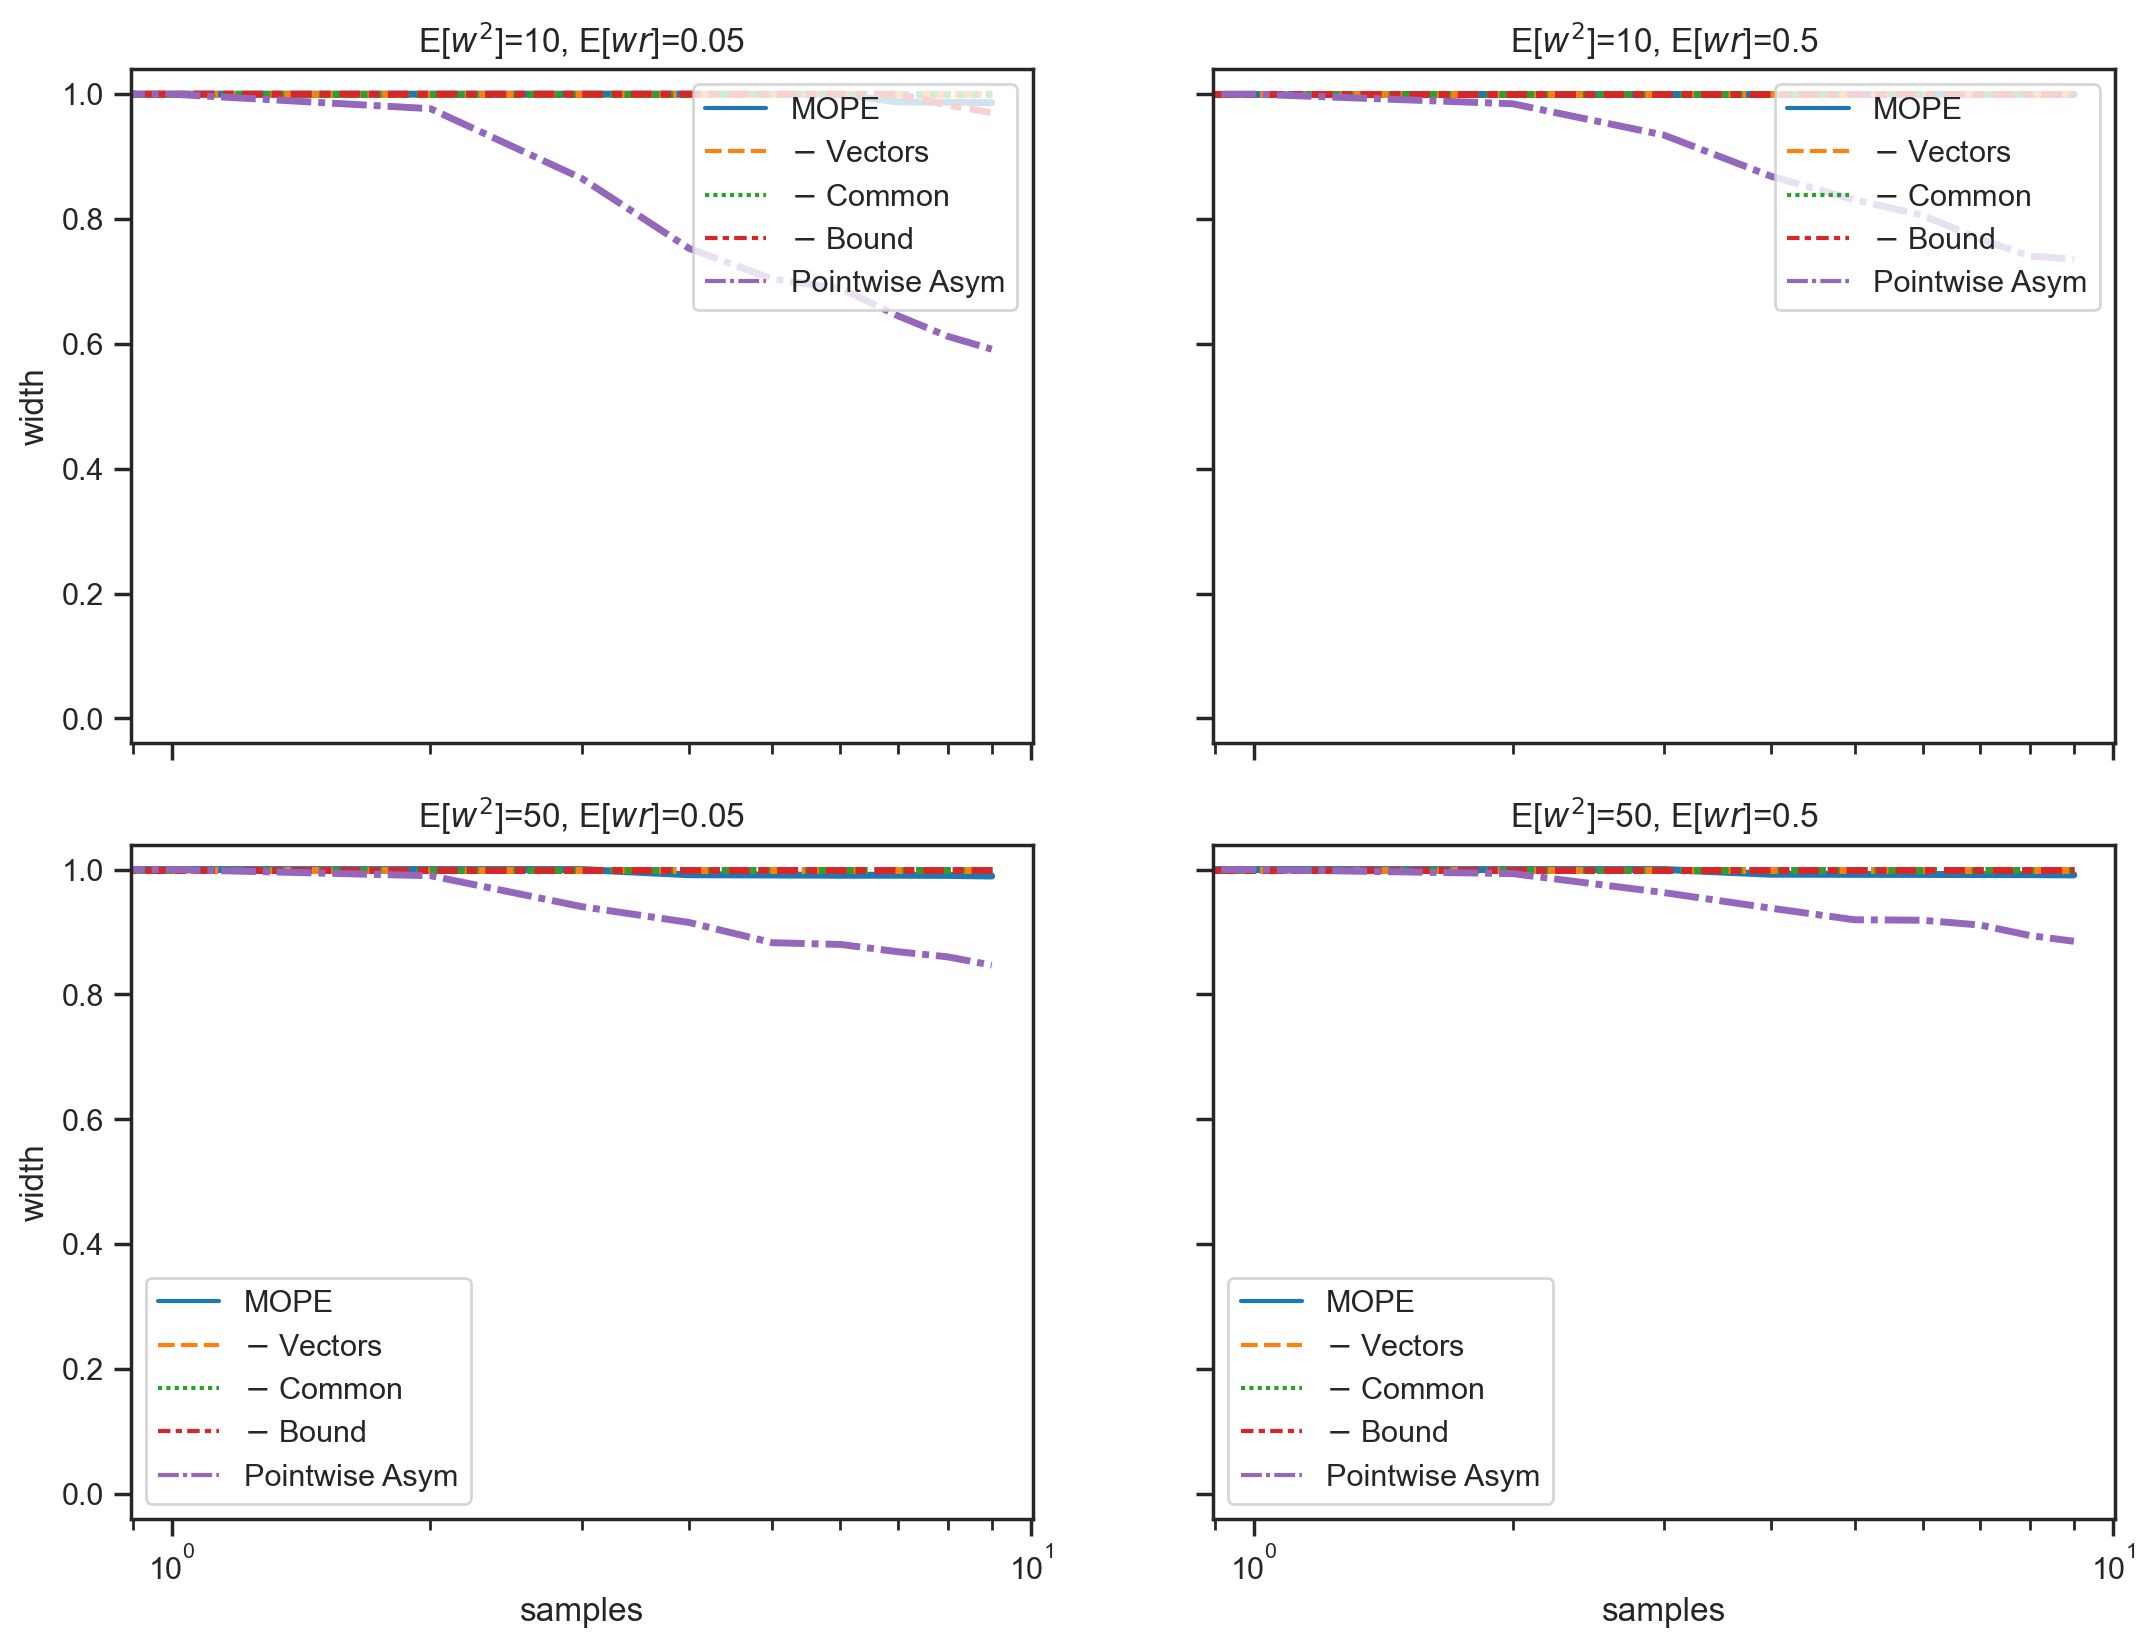

In [14]:
legend = {'2d': 'MOPE', '1d': '$-$ Vectors', 'iqp': '$-$ Common', 'log': '$-$ Bound', 'pointasym': 'Pointwise Asym'}
fig, ax = plt.subplots(2,2, sharex='col', sharey='row', figsize=(12.8, 9.6), dpi=200, gridspec_kw={'hspace': 0.15})
for i,wsq in enumerate((10, 50)):
    for j,tv in enumerate((0.05, 0.5)):
        d = {}
        for method in '2d','1d','iqp','log', 'pointasym':
            name = f'width{method}_{wsq}_{tv}.pkl'
            with open(name, 'rb') as pkl:
                d[legend[method]] = pickle.load(pkl)[1]['width']
        experiments.plotit(d,f'E[$w^2$]={wsq}, E[$wr$]={tv}', ax=ax[i,j])
ax[0,0].set(xscale="log")
ax[0,1].set(xscale="log")
ax[0,0].legend(loc='upper right')
ax[0,1].legend(loc='upper right')
#fig.savefig('width.pdf', bbox_inches='tight', pad_inches=0)

## The following takes 4 days to run but eventually produces Figure 2 from the paper

In [ ]:
N = 500000
wsqs = (10,50)
tvs = (0.05, 0.5)

if __name__ ==  '__main__': 
    num_processors = 4
    p=Pool(processes = num_processors)
    output = p.starmap(experiments.width_experiment,[(N,wsq,tv) for wsq in wsqs for tv in tvs])
    print(output)

for wsq in wsqs:
    for tv in tvs:
        pointwise_asym = experiments.evaluate(f'widthpointasym_{wsq}_{tv}.pkl', experiments.pointwise_asym_ci, alpha=0.05, ndata=N, reps=10, wsq=wsq, tv=tv)


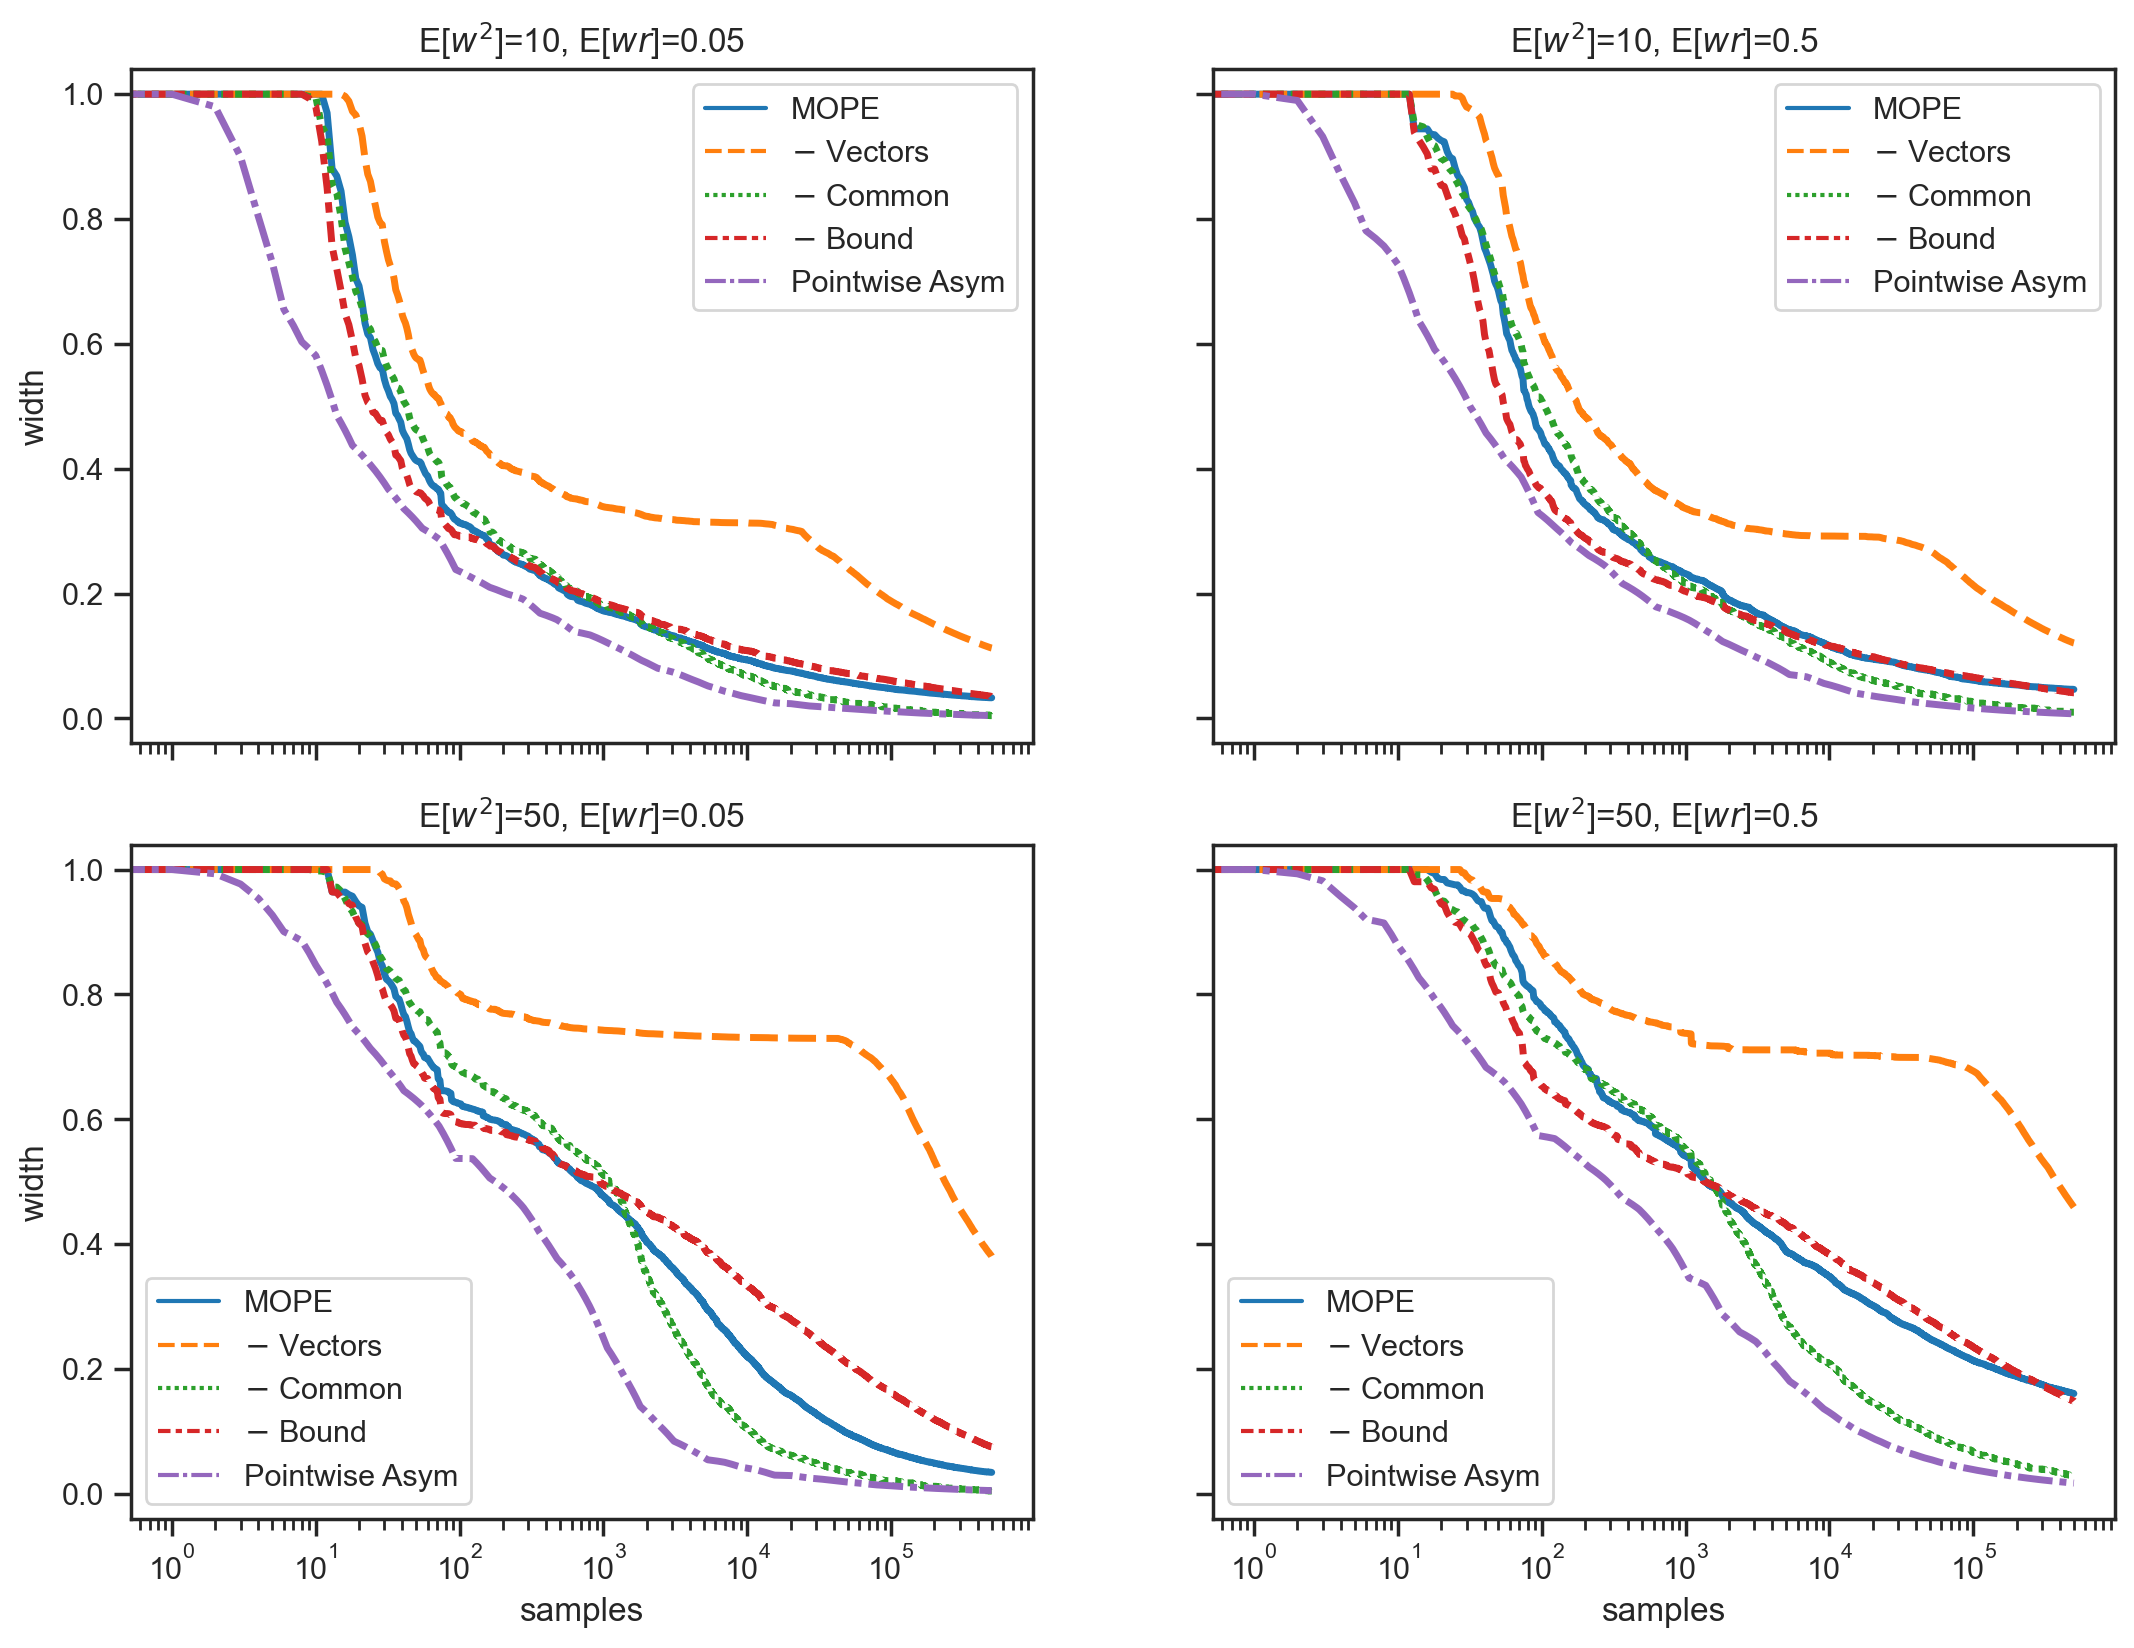

In [73]:
legend = {'2d': 'MOPE', '1d': '$-$ Vectors', 'iqp': '$-$ Common', 'log': '$-$ Bound', 'pointasym': 'Pointwise Asym'}
fig, ax = plt.subplots(2,2, sharex='col', sharey='row', figsize=(12.8, 9.6), dpi=200, gridspec_kw={'hspace': 0.15})
for i,wsq in enumerate((10, 50)):
    for j,tv in enumerate((0.05, 0.5)):
        d = {}
        for method in '2d','1d','iqp','log', 'pointasym':
            name = f'width{method}_{wsq}_{tv}.pkl'
            with open(name, 'rb') as pkl:
                d[legend[method]] = pickle.load(pkl)[1]['width']
        experiments.plotit(d,f'E[$w^2$]={wsq}, E[$wr$]={tv}', ax=ax[i,j])
ax[0,0].set(xscale="log")
ax[0,1].set(xscale="log")
ax[0,0].legend(loc='upper right')
ax[0,1].legend(loc='upper right')
fig.savefig('width.pdf', bbox_inches='tight', pad_inches=0)